<a href="https://colab.research.google.com/github/KollaYoshitha/Book-Management-MVC-/blob/master/Face_Mask_Detection_using_CNN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [9]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/archive (3).zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
!ls

'archive (3).zip'   data   sample_data


**Importing the Dependencies**

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3441.jpg', 'with_mask_763.jpg', 'with_mask_1167.jpg', 'with_mask_3255.jpg', 'with_mask_255.jpg']
['with_mask_2789.jpg', 'with_mask_571.jpg', 'with_mask_862.jpg', 'with_mask_2477.jpg', 'with_mask_3459.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2842.jpg', 'without_mask_2315.jpg', 'without_mask_3518.jpg', 'without_mask_326.jpg', 'without_mask_3460.jpg']
['without_mask_2137.jpg', 'without_mask_3114.jpg', 'without_mask_1760.jpg', 'without_mask_2155.jpg', 'without_mask_1897.jpg']


In [14]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [15]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

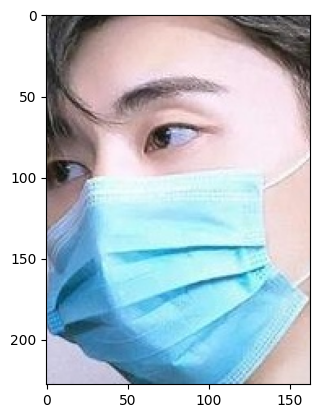

In [19]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

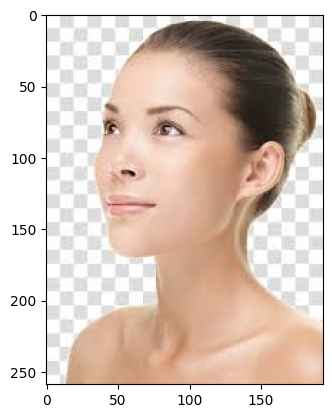

In [20]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [21]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

# Iterate over all image files in the with_mask directory
for img_file in with_mask_files:
  # Open the image file
  image = Image.open(with_mask_path + img_file)
  # Resize the image to 128x128
  image = image.resize((128,128))
  # Convert the image to RGB format
  image = image.convert('RGB')
  # Convert the image to a NumPy array
  image = np.array(image)
  # Append the NumPy array to the data list
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
# Iterate over all image files in the without_mask directory
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

array([[[80, 80, 82],
        [81, 81, 83],
        [84, 84, 86],
        ...,
        [81, 81, 83],
        [79, 79, 81],
        [77, 77, 79]],

       [[80, 80, 82],
        [81, 81, 83],
        [83, 83, 85],
        ...,
        [83, 83, 85],
        [81, 81, 83],
        [78, 78, 80]],

       [[81, 81, 83],
        [82, 82, 84],
        [85, 85, 87],
        ...,
        [84, 84, 86],
        [82, 82, 84],
        [81, 81, 83]],

       ...,

       [[45, 45, 47],
        [45, 45, 47],
        [46, 46, 48],
        ...,
        [41, 41, 43],
        [41, 41, 43],
        [40, 40, 42]],

       [[44, 44, 46],
        [45, 45, 47],
        [46, 46, 48],
        ...,
        [41, 41, 42],
        [40, 40, 42],
        [40, 40, 42]],

       [[44, 44, 46],
        [44, 44, 46],
        [45, 45, 47],
        ...,
        [40, 40, 41],
        [39, 39, 42],
        [39, 39, 41]]], dtype=uint8)
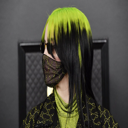

In [24]:
data[0]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

In [27]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [30]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [31]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [34]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

These lines of code are scaling the training and test data by dividing each pixel value by 255. This is a common practice in image processing to normalize the data and improve the performance of machine learning models.

array([[[ 89,  94,  98],
        [ 91,  96, 100],
        [ 90,  94,  98],
        ...,
        [ 49,  46,  57],
        [ 49,  46,  57],
        [ 49,  46,  57]],

       [[101, 106, 110],
        [103, 108, 112],
        [102, 106, 110],
        ...,
        [ 49,  46,  57],
        [ 49,  46,  57],
        [ 49,  46,  57]],

       [[109, 114, 117],
        [111, 116, 119],
        [110, 114, 117],
        ...,
        [ 49,  46,  57],
        [ 49,  46,  57],
        [ 49,  46,  57]],

       ...,

       [[  2,  75, 114],
        [  1,  74, 112],
        [  1,  75, 109],
        ...,
        [184, 200, 213],
        [177, 196, 210],
        [169, 189, 204]],

       [[  5,  68, 105],
        [  5,  69, 103],
        [  5,  68, 101],
        ...,
        [185, 200, 212],
        [177, 192, 204],
        [170, 186, 197]],

       [[ 17,  68, 102],
        [ 16,  68, 101],
        [ 16,  68,  98],
        ...,
        [174, 189, 201],
        [169, 183, 194],
        [166, 180, 189]]], dtype=uint8)
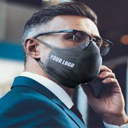

In [35]:
X_train[0]

In [36]:
X_train_scaled[0]

array([[[0.34901961, 0.36862745, 0.38431373],
        [0.35686275, 0.37647059, 0.39215686],
        [0.35294118, 0.36862745, 0.38431373],
        ...,
        [0.19215686, 0.18039216, 0.22352941],
        [0.19215686, 0.18039216, 0.22352941],
        [0.19215686, 0.18039216, 0.22352941]],

       [[0.39607843, 0.41568627, 0.43137255],
        [0.40392157, 0.42352941, 0.43921569],
        [0.4       , 0.41568627, 0.43137255],
        ...,
        [0.19215686, 0.18039216, 0.22352941],
        [0.19215686, 0.18039216, 0.22352941],
        [0.19215686, 0.18039216, 0.22352941]],

       [[0.42745098, 0.44705882, 0.45882353],
        [0.43529412, 0.45490196, 0.46666667],
        [0.43137255, 0.44705882, 0.45882353],
        ...,
        [0.19215686, 0.18039216, 0.22352941],
        [0.19215686, 0.18039216, 0.22352941],
        [0.19215686, 0.18039216, 0.22352941]],

       ...,

       [[0.00784314, 0.29411765, 0.44705882],
        [0.00392157, 0.29019608, 0.43921569],
        [0.00392157, 0

**Building a Convolutional Neural Networks (CNN)**

In [37]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

# First convolutional block
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

- num_of_classes: This variable specifies the number of classes that the model will predict. In this case, it is set to 2.
- model: This variable stores the Keras model object.
- keras.Sequential(): This creates a sequential model, where each layer is added sequentially.
- model.add(keras.layers.Conv2D(...)): This adds a convolutional layer to the model.
- 32: This specifies the number of filters in the convolutional layer.
- kernel_size=(3,3): This specifies the size of the filter used in the convolution.
- activation='relu': This specifies the activation function used in the convolutional layer.
- input_shape=(128,128,3): This specifies the shape of the input images.
- model.add(keras.layers.MaxPooling2D(...)): This adds a max pooling layer to the model.
- pool_size=(2,2): This specifies the size of the pooling window.
- model.add(keras.layers.Flatten()): This flattens the output of the previous layer into a single dimension
- model.add(keras.layers.Dense(128, activation='relu')): This adds a dense layer with 128 units and ReLU activation.
- model.add(keras.layers.Dropout(0.5)): This adds a dropout layer with a rate of 0.5, which means that 50% of the units in the previous layer will be randomly dropped during training.
- model.add(keras.layers.Dense(64, activation='relu')): This adds another dense layer with 64 units and ReLU activation.
- model.add(keras.layers.Dropout(0.5)): This adds another dropout layer with a rate of 0.5.
- model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')): This adds a final dense layer with a number of units equal to the number of classes and sigmoid activation.

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 25ms/step - loss: 0.5206 - acc: 0.7708 - val_loss: 0.3014 - val_acc: 0.8678
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2892 - acc: 0.8878 - val_loss: 0.2424 - val_acc: 0.8959
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2550 - acc: 0.9003 - val_loss: 0.2517 - val_acc: 0.8876
Epoch 4/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2065 - acc: 0.9178 - val_loss: 0.2236 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1813 - acc: 0.9283 - val_loss: 0.2570 - val_acc: 0.9256


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2103 - acc: 0.9232
Test Accuracy = 0.9232296347618103


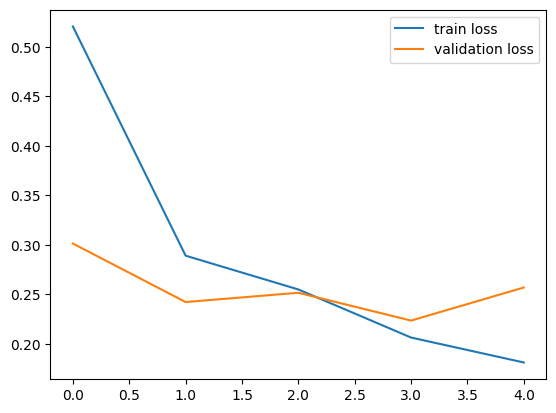

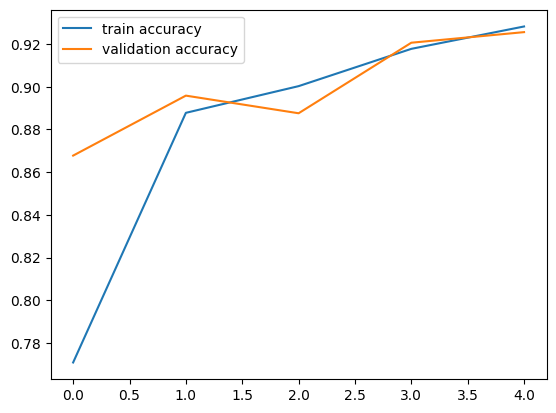

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/WhatsApp Image 2024-02-23 at 2.28.10 PM (1).jpeg


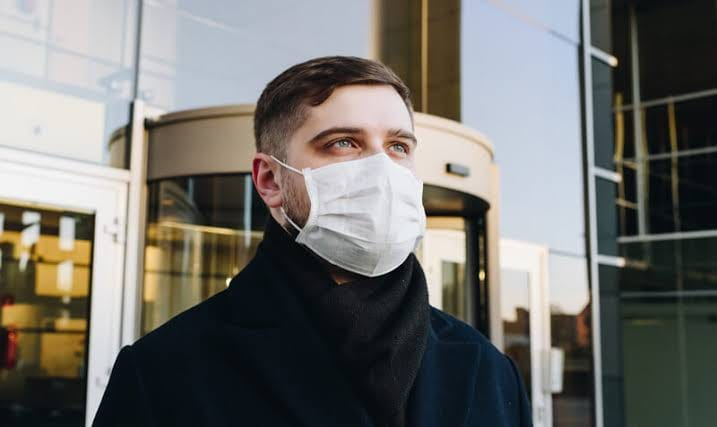

1/1 [==============================] - 0s 363ms/step
[[0.26547858 0.7631567 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/WhatsApp Image 2024-02-23 at 2.28.10 PM.jpeg


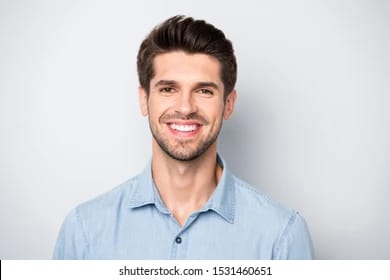

1/1 [==============================] - 0s 17ms/step
[[0.4265869  0.51102287]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')